# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
df = pd.read_csv("G:/Meu Drive/PEDRO SMS -TI 2025/Diversos 2025/EBAC/ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [24]:
#Seu código aqui
# A seguir vamos verificar o DataFrame, se há a necessidade de alterar alguma categoria:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


In [25]:
# Após Dataframe acima, observamos que será necessário fazer as seguintes alterações de categorias:

# A seguir a alteração de categoria da coluna 'Valor_Aluguel' de 'int' para 'float':
df['Valor_Aluguel'] = df['Valor_Aluguel'].astype(float)

# A seguir a alteração de categoria da coluna 'Valor_Condominio' de 'int' para 'float':
df['Valor_Condominio'] = df['Valor_Condominio'].astype(float)

# A seguir a alteração de categoria da coluna 'Metragem' de 'int' para 'float':
df['Metragem'] = df['Metragem'].astype(float)

# A seguir a nova verificação:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Valor_Aluguel     7203 non-null   float64
 1   Valor_Condominio  7203 non-null   float64
 2   Metragem          7203 non-null   float64
 3   N_Quartos         7203 non-null   int64  
 4   N_banheiros       7203 non-null   int64  
 5   N_Suites          7203 non-null   int64  
 6   N_Vagas           7203 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 394.0 KB


In [26]:
# A seguir a verificação se há dados faltantes no DataFrame:
df.isnull().sum()

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

In [ ]:
# Conforme dados acima, não possuímos datos faltantes, não sendo necessário o tratamento dos dados.

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [27]:
#Seu código aqui
# A) Iniciaremos com a função 'describe' para observarmos o DataFrame, as variáveis numéricas:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


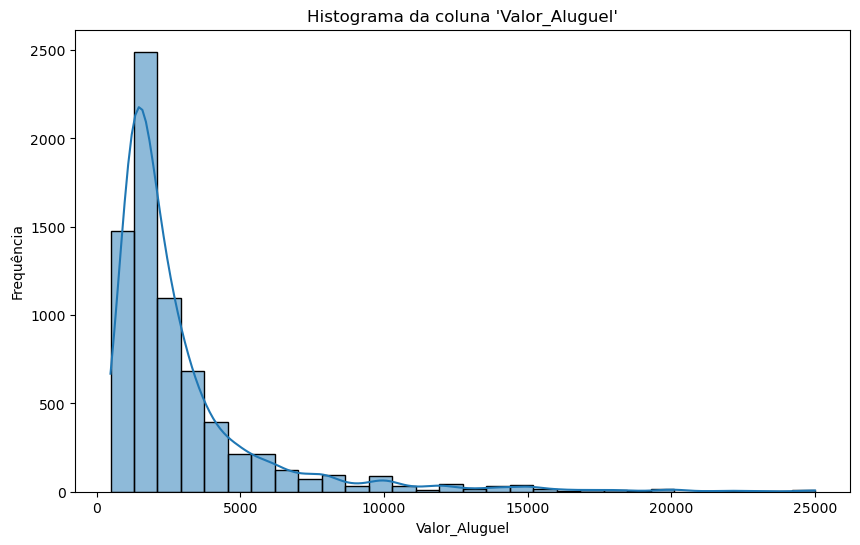

In [32]:
# A seguir faremos o histograma para ver a distribuição da coluna 'Valor_Aluguel' para observarmos a distribuição dos dados:
plt.figure(figsize=(10, 6))
sns.histplot(df['Valor_Aluguel'], bins=30, kde=True)
plt.title("Histograma da coluna 'Valor_Aluguel'")
plt.xlabel("Valor_Aluguel")
plt.ylabel("Frequência")
plt.show()

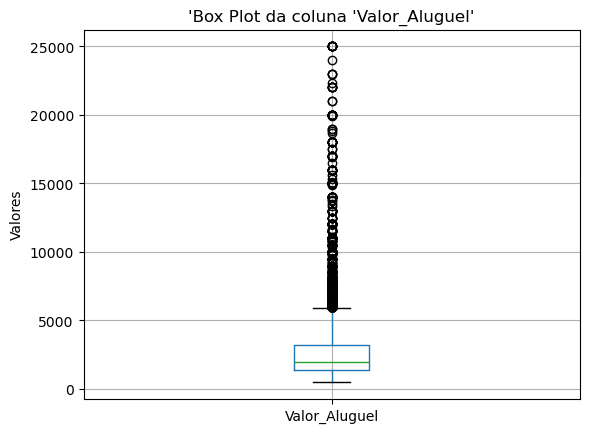

In [33]:
# B) A seguir faremos o boxplot da coluna 'Valor_Aluguel' para observarmos a distribuição dos valores no gráfico:
df.boxplot(column='Valor_Aluguel')
plt.title("'Box Plot da coluna 'Valor_Aluguel'")
plt.ylabel('Valores')
plt.show()

In [34]:
# A seguir faremos a verificação dos dados acima de '5000' para saber se houve algum tipo de erro de digitação:

df[df['Valor_Aluguel'] > 5000]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
6324,5100.0,2200.0,100.0,2,3,2,2
6325,5100.0,950.0,70.0,2,2,1,1
6326,5100.0,695.0,74.0,2,2,1,1
6327,5190.0,1200.0,130.0,2,3,1,2
6328,5200.0,1160.0,86.0,2,2,1,2
...,...,...,...,...,...,...,...
7198,25000.0,7500.0,627.0,4,5,4,6
7199,25000.0,4600.0,364.0,4,2,1,0
7200,25000.0,3700.0,266.0,3,4,3,7
7201,25000.0,6000.0,600.0,4,5,4,8


In [35]:
#  Observando o DataFrame acima, aparentemente a coluna 'Valor_Aluguel' não parece ter erros de digitação, pois possuímos diversos valores de '25.000' o que indica que o valor do aluguel realmente chega à '25.000'.

# A seguir veremos a porcentagem dos dados dos registros acima dos '5000':
print("Porcentagem de registros onde 'Valor_Aluguel' > 5000:",
      (len(df[df['Valor_Aluguel'] > 5000]) / len(df)) * 100)


Porcentagem de registros onde 'Valor_Aluguel' > 5000: 12.203248646397334


In [36]:
# Conforme Boxplot da coluna 'Valor_Aluguel' e DataFrame acima, foi identificado a presença de outliers, certa de 12.2% do total dos dados. Obervamos também que se tratam de valores legítimos, sem erros de digitação.
# Por saber que precisaremos futuramente fazer modelos de regressão linear e que esses outliers podem influenciar na média do total de dados (os aproximadamente 88% restantes), optaremos por tratar os estes outiliers a seguir:
# A seguir aplicaremos a transformação logarítmica para futuramente melhorar o ajuste do modelo de regressão linear:
# A seguir importaremos nova biblioteca e aplicaremos a transformação:
import numpy as np
df['Valor_Aluguel_log'] = np.log1p(df['Valor_Aluguel'])



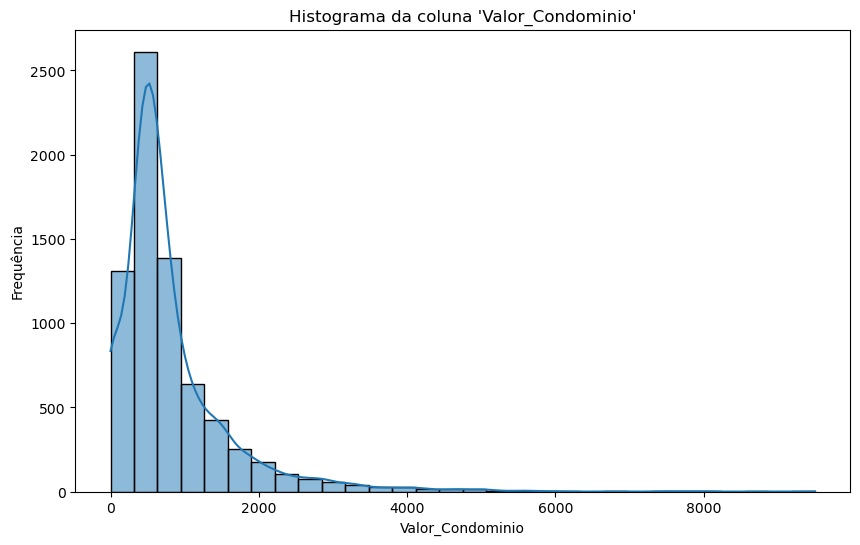

In [37]:
# Desta forma, o modelo ficará menos sensível aos extremos, mas ainda considerará toda a informação.

# A seguir faremos o histograma para ver a distribuição da coluna 'Valor_Condominio' para observarmos a distribuição dos dados:
plt.figure(figsize=(10, 6))
sns.histplot(df['Valor_Condominio'], bins=30, kde=True)
plt.title("Histograma da coluna 'Valor_Condominio'")
plt.xlabel("Valor_Condominio")
plt.ylabel("Frequência")
plt.show()

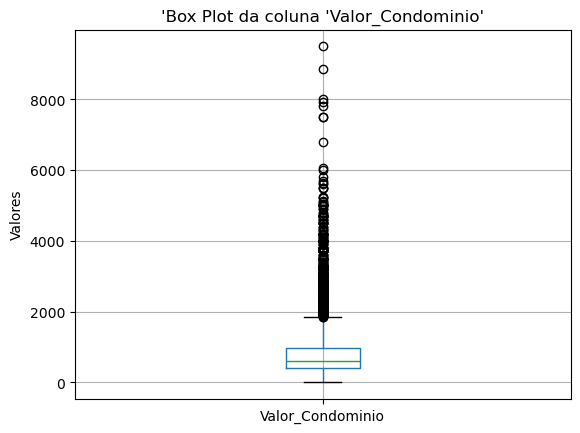

In [38]:
# A seguir faremos o boxplot da coluna 'Valor_Condominio' para observarmos a distribuição dos valores no gráfico:
df.boxplot(column='Valor_Condominio')
plt.title("'Box Plot da coluna 'Valor_Condominio'")
plt.ylabel('Valores')
plt.show()

In [39]:
# A seguir faremos a verificação dos dados acima de '2000' para saber se houve algum tipo de erro de digitação:

df[df['Valor_Condominio'] > 2000]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas,Valor_Aluguel_log
1649,1300.0,2435.0,208.0,4,3,2,3,7.170888
2156,1500.0,2893.0,230.0,3,2,1,2,7.313887
2492,1500.0,2893.0,230.0,3,2,1,2,7.313887
2898,1699.0,2256.0,42.0,1,2,1,1,7.438384
3525,1900.0,2200.0,225.0,4,2,1,3,7.550135
...,...,...,...,...,...,...,...,...
7197,25000.0,5636.0,327.0,4,3,2,3,10.126671
7198,25000.0,7500.0,627.0,4,5,4,6,10.126671
7199,25000.0,4600.0,364.0,4,2,1,0,10.126671
7200,25000.0,3700.0,266.0,3,4,3,7,10.126671


In [40]:
#  Observando o DataFrame acima, aparentemente a coluna 'Valor_Condominio' não parece ter erros de digitação, o que indica que o valor do aluguel realmente chega à '9500'.

# A seguir veremos a porcentagem dos dados dos registros acima dos '2000':
print("Porcentagem de registros onde 'Valor_Condominio' > 2000:",
      (len(df[df['Valor_Condominio'] > 2000]) / len(df)) * 100)

Porcentagem de registros onde 'Valor_Condominio' > 2000: 6.705539358600583


In [52]:
# Após análise, usaremos o mesmo critério da variável 'Valor_Aluguel', onde faremos a transformação logarítmica da coluna 'Valor_Condominio':
df['Valor_Condominio_log'] = np.log1p(df['Valor_Condominio'])

In [53]:
# Iniciaremos com a função 'describe' para observarmos o novo DataFrame:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas,Valor_Aluguel_log,Valor_Condominio_log,Metragem_log
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000,7203.000000,7203.000000,7203.000000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176,7.715575,5.935956,4.340613
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993,0.681132,1.992531,0.513099
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000,6.175867,0.000000,3.433987
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000,7.208600,5.981414,3.970292
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000,7.601402,6.385194,4.219508
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000,8.071219,6.888572,4.615121
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000,10.126671,9.159152,6.781058


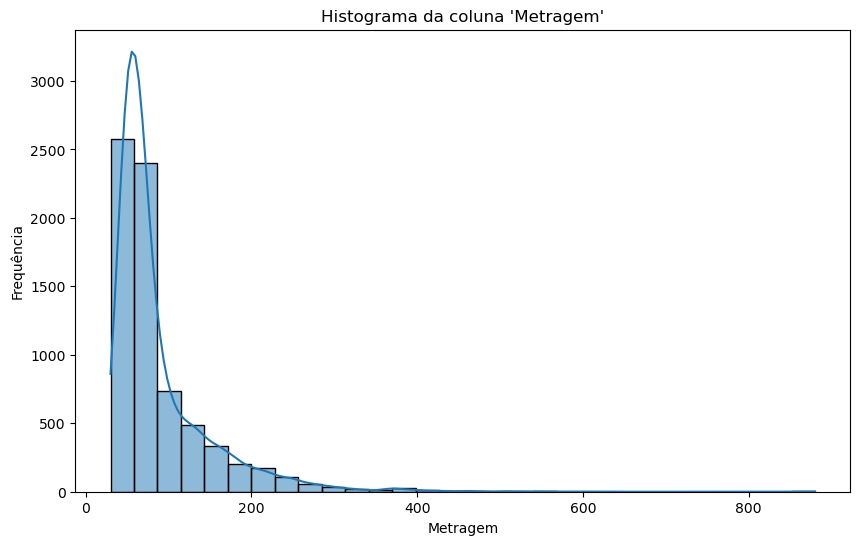

In [43]:
# A seguir faremos o histograma para ver a distribuição da coluna 'Metragem' para observarmos a distribuição dos dados:
plt.figure(figsize=(10, 6))
sns.histplot(df['Metragem'], bins=30, kde=True)
plt.title("Histograma da coluna 'Metragem'")
plt.xlabel("Metragem")
plt.ylabel("Frequência")
plt.show()

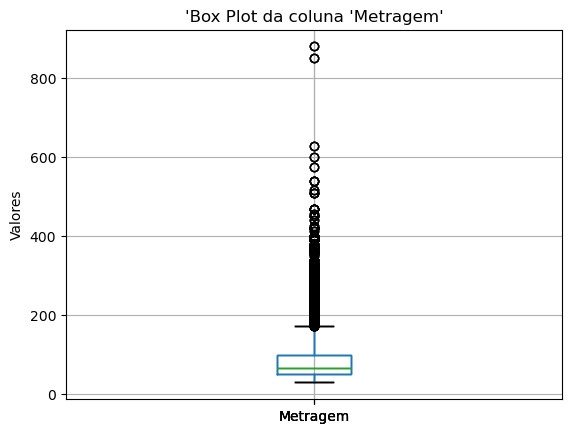

In [46]:
# A seguir faremos o boxplot da coluna 'Metragem' para observarmos a distribuição dos valores no gráfico:
df.boxplot(column='Metragem')
plt.title("'Box Plot da coluna 'Metragem'")
plt.ylabel('Valores')
plt.show()

In [54]:
# A seguir faremos a verificação dos dados acima de '190' para saber se houve algum tipo de erro de digitação:

df[df['Metragem'] > 190]

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas,Valor_Aluguel_log,Valor_Condominio_log,Metragem_log
1649,1300.0,2435.0,208.0,4,3,2,3,7.170888,7.798113,5.342334
2156,1500.0,2893.0,230.0,3,2,1,2,7.313887,7.970395,5.442418
2492,1500.0,2893.0,230.0,3,2,1,2,7.313887,7.970395,5.442418
2989,1700.0,0.0,250.0,3,2,1,0,7.438972,0.000000,5.525453
3525,1900.0,2200.0,225.0,4,2,1,3,7.550135,7.696667,5.420535
...,...,...,...,...,...,...,...,...,...,...
7198,25000.0,7500.0,627.0,4,5,4,6,10.126671,8.922792,6.442540
7199,25000.0,4600.0,364.0,4,2,1,0,10.126671,8.434029,5.899897
7200,25000.0,3700.0,266.0,3,4,3,7,10.126671,8.216358,5.587249
7201,25000.0,6000.0,600.0,4,5,4,8,10.126671,8.699681,6.398595


In [49]:
#  Observando o DataFrame acima, aparentemente a coluna 'Metragem' não parece ter erros de digitação, o que indica que a metragem realmente chega à '880'.

# A seguir veremos a porcentagem dos dados dos registros acima dos '190':
print("Porcentagem de registros onde 'Metragem' > 190:",
      (len(df[df['Metragem'] > 190]) / len(df)) * 100)

Porcentagem de registros onde 'Metragem' > 190: 6.774954879911148


In [50]:
# Após análise, usaremos o mesmo critério da variável 'Valor_Aluguel', onde faremos a transformação logarítmica da coluna 'Metragem':
df['Metragem_log'] = np.log1p(df['Metragem'])

In [55]:
# Iniciaremos com a função 'describe' para observarmos o novo DataFrame:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas,Valor_Aluguel_log,Valor_Condominio_log,Metragem_log
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000,7203.000000,7203.000000,7203.000000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176,7.715575,5.935956,4.340613
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993,0.681132,1.992531,0.513099
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000,6.175867,0.000000,3.433987
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000,7.208600,5.981414,3.970292
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000,7.601402,6.385194,4.219508
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000,8.071219,6.888572,4.615121
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000,10.126671,9.159152,6.781058


In [ ]:
# Conforme DataFrame acima, descartaremos da análise de outliers as colunas 'N_Quartos', 'N_banheiros', 'N_Suites' e 'N_Vagas', pois aparentemente possui os dados bem distribuídos e visualmente sem erros de digitação.

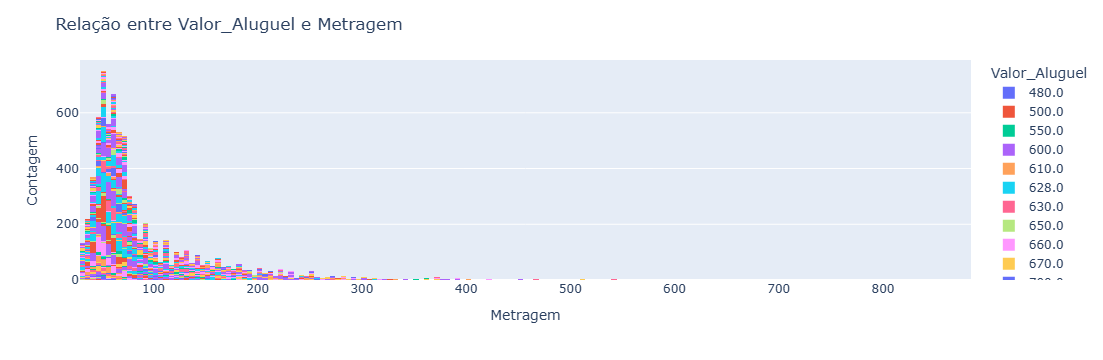

In [63]:
# C) A seguir faremos a análise bivariada:
# Abaixo um questionameno para análise:
# O que mais influenciará no valor do auguel? a Metragem ou quantidade de quartos?
# Variável 'Metragem' x 'Valor_Aluguel':
fig = px.histogram(df, x='Metragem', color='Valor_Aluguel', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Valor_Aluguel e Metragem',
                  xaxis_title='Metragem',
                  yaxis_title='Contagem',
                  legend_title='Valor_Aluguel')
fig.show()


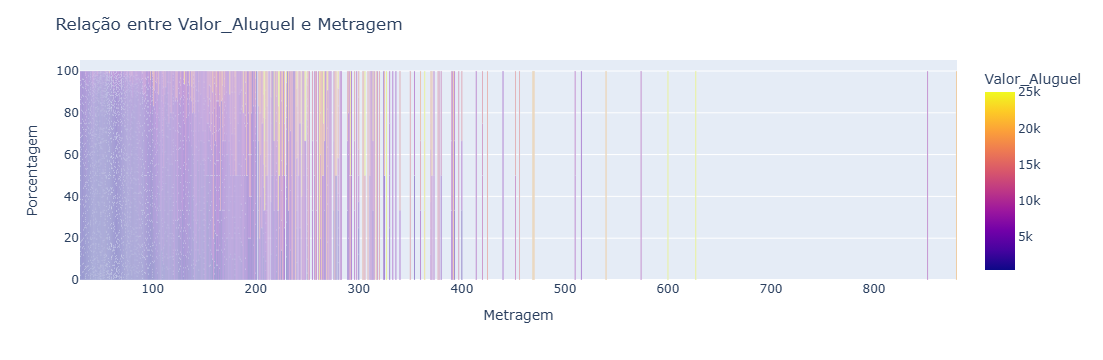

In [64]:
# A seguir, a porcentagem de cada categoria:
df_grouped = df.groupby(['Metragem', 'Valor_Aluguel']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Metragem')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Gráfico de barras empilhadas:
fig = px.bar(df_grouped, x='Metragem', y='percent', color='Valor_Aluguel', barmode='stack',
             labels={'Metragem': 'Metragem', 'percent': 'Porcentagem', 'Valor_Aluguel': 'Valor_Aluguel'})

fig.update_layout(title='Relação entre Valor_Aluguel e Metragem',
                  yaxis_title='Porcentagem',
                  legend_title='Valor_Aluguel')
fig.show()

In [ ]:
# De acordo com os dois gráficos acima, nota-se que a metragem influência no valor do aluguel, porém possivelmente a localização e estado do imóvel deve influenciar mais, pois existem excessões onde nem sempre quanto maior a metragem maior o valor do aluguel, o que indica que a variável 'Valor_Alguel' possui fortes correlações com outras varáveis.
# Nota-se também que a maioria dos imóveis possui entre 33 e 114 metros, havendo o pico de 50 a 54 metros.b

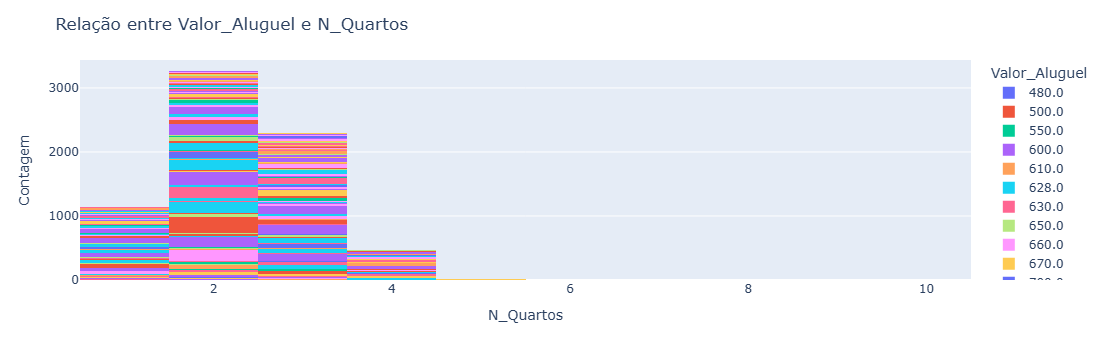

In [65]:
# A seguir, faremos a relação entre a Variável 'N_Quartos' x 'Valor_Aluguel':
fig = px.histogram(df, x='N_Quartos', color='Valor_Aluguel', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Valor_Aluguel e N_Quartos',
                  xaxis_title='N_Quartos',
                  yaxis_title='Contagem',
                  legend_title='Valor_Aluguel')
fig.show()

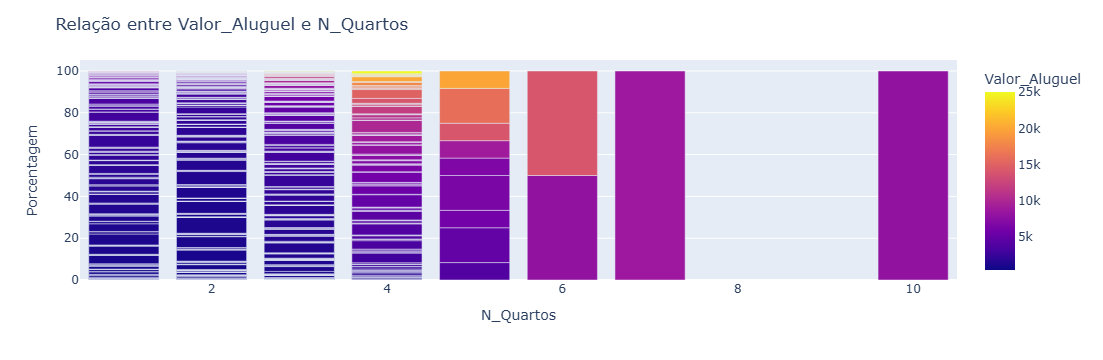

In [66]:
# A seguir, a porcentagem de cada categoria:
df_grouped = df.groupby(['N_Quartos', 'Valor_Aluguel']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('N_Quartos')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Gráfico de barras empilhadas:
fig = px.bar(df_grouped, x='N_Quartos', y='percent', color='Valor_Aluguel', barmode='stack',
             labels={'N_Quartos': 'N_Quartos', 'percent': 'Porcentagem', 'Valor_Aluguel': 'Valor_Aluguel'})

fig.update_layout(title='Relação entre Valor_Aluguel e N_Quartos',
                  yaxis_title='Porcentagem',
                  legend_title='Valor_Aluguel')
fig.show()

In [ ]:
# Conforme gráficos acima, nota-se que o número de quartos não influência muito no valor do aluguel.
# Observamos também que os 100% dos imóveis que possuem 10 quartos, o valor do aluguel é '8000' e 100% dos imóveis que possuem 7 quartos, o valor do aluguel é maior, sendo o valor '8700'.
# Nota-se que nenhum imóvel possui a quantidade de 8 e 9 quartos.
# Observamos também que a maioria é formada por imóveis que possuem de 1 a 4 quartos, sendo que o pico ocorre com imóveis que possuem 2 quartos.

In [ ]:
# Feitas essas análises, chegamos a conclusão que a metragm influencia mais que a quantidade de quartos no valor de aluguel, porém não é a única variável que influencia.


# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




In [67]:
#Seu código aqui
# Importando a biblioteca Scikit-learn:
import sklearn
# A seguir faremos a análise de correlação entre as variáveis: 
df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas,Valor_Aluguel_log,Valor_Condominio_log,Metragem_log
0,480.0,295.0,48.0,2,2,1,1,6.175867,5.690359,3.891820
1,500.0,0.0,50.0,1,2,1,1,6.216606,0.000000,3.931826
2,500.0,0.0,40.0,1,2,1,1,6.216606,0.000000,3.713572
3,500.0,36.0,45.0,1,2,1,0,6.216606,3.610918,3.828641
4,500.0,0.0,30.0,1,1,0,0,6.216606,0.000000,3.433987
5,500.0,380.0,66.0,2,1,0,1,6.216606,5.942799,4.204693
6,550.0,100.0,48.0,2,2,1,1,6.311735,4.615121,3.891820
7,600.0,110.0,46.0,2,2,1,1,6.398595,4.709530,3.850148
8,600.0,100.0,49.0,2,2,1,1,6.398595,4.615121,3.912023
9,600.0,325.0,50.0,2,2,1,1,6.398595,5.786897,3.931826


In [68]:
# A seguir faremos a 'Matriz de Correlação' das variáveis numéricas do DataFrame:
df.select_dtypes(include=['number']).corr()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas,Valor_Aluguel_log,Valor_Condominio_log,Metragem_log
Valor_Aluguel,1.000000,0.695302,0.730591,0.413139,0.603715,0.614397,0.652858,0.893671,0.285943,0.684123
Valor_Condominio,0.695302,1.000000,0.805926,0.497420,0.585795,0.589244,0.690993,0.682115,0.583666,0.747583
Metragem,0.730591,0.805926,1.000000,0.678091,0.687558,0.696281,0.743872,0.707748,0.322619,0.933634
N_Quartos,0.413139,0.497420,0.678091,1.000000,0.553807,0.540887,0.591224,0.440619,0.243020,0.762561
N_banheiros,0.603715,0.585795,0.687558,0.553807,1.000000,0.920149,0.694983,0.610683,0.232967,0.687109
N_Suites,0.614397,0.589244,0.696281,0.540887,0.920149,1.000000,0.712054,0.605065,0.223651,0.674969
N_Vagas,0.652858,0.690993,0.743872,0.591224,0.694983,0.712054,1.000000,0.657702,0.323660,0.733473
Valor_Aluguel_log,0.893671,0.682115,0.707748,0.440619,0.610683,0.605065,0.657702,1.000000,0.351782,0.726896
Valor_Condominio_log,0.285943,0.583666,0.322619,0.243020,0.232967,0.223651,0.323660,0.351782,1.000000,0.355484
Metragem_log,0.684123,0.747583,0.933634,0.762561,0.687109,0.674969,0.733473,0.726896,0.355484,1.000000


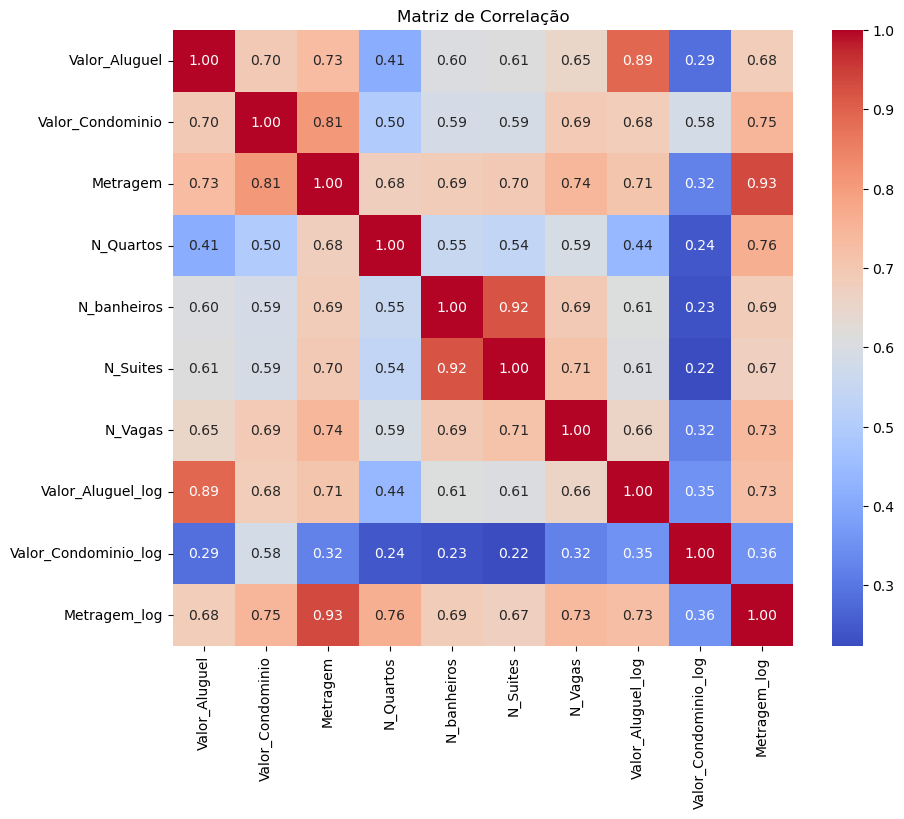

In [69]:
# A seguir faremos o mapa de calor para analisarmos:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# Conforme Matriz de Correlação, DataFrame e Mapa de Calor acima, indicamos as seguintes correlações altas (acima de 0.70):

# 'N_Banheiros' e 'N_Suites' = Correlação alta = 0.92;
# 'Metragem' e 'N_Vagas' = Correlação alta = 0.74;
# 'Metragem' e 'N_Vagas' = Correlação alta = 0.74;
# 'Valor_Aluguel' e 'Metragem' = Correlação alta = 0.73;
# 'Valor_Condominio' e 'Metragem' = Correlação alta = 0.73;
# 'N_Suites' e 'N_Vagas' = Correlação alta = 0.71;
# 'Valor_Aluguel' e 'Valor_Condominio' = Correlação alta = 0.70;
# 'Metragem' e 'N_Suites' = Correlação alta = 0.70;



B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [ ]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [70]:
# Seu código aqui
# a seguir vamos separar os dados em features (X) e o alvo (y)
X = df.drop('Valor_Aluguel', axis=1)  # Considerando que 'Valor_Aluguel' é a coluna a ser predita:
y = df['Valor_Aluguel']

In [71]:
# Importando nova bilioteca:
from sklearn.model_selection import train_test_split

In [72]:
# A seguir faremos a separação dos dados em conjuntos de treinos e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Determinamos 75% dos dados para treino e 25% para teste.

In [73]:
# A seguir, vamos verificar a quantidade de linhas e novos DataFrames:
X_train

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas,Valor_Aluguel_log,Valor_Condominio_log,Metragem_log
6931,1350.0,176.0,3,4,3,3,9.210440,7.208600,5.176150
4125,680.0,70.0,1,1,0,2,7.696667,6.523562,4.262680
6079,650.0,66.0,2,1,0,1,8.412055,6.478510,4.204693
5044,655.0,68.0,3,2,1,1,7.972811,6.486161,4.234107
2299,330.0,33.0,1,1,0,1,7.313887,5.802118,3.526361
...,...,...,...,...,...,...,...,...,...
3772,450.0,48.0,2,2,1,1,7.601402,6.111467,3.891820
5191,570.0,34.0,1,1,0,1,8.006701,6.347389,3.555348
5226,976.0,95.0,2,2,1,1,8.006701,6.884487,4.564348
5390,550.0,74.0,3,3,1,2,8.071219,6.311735,4.317488


In [74]:
# A seguir veremos 'X_text':
X_test

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas,Valor_Aluguel_log,Valor_Condominio_log,Metragem_log
3885,484.0,50.0,2,1,0,1,7.650169,6.184149,3.931826
4661,680.0,50.0,2,1,0,1,7.824446,6.523562,3.931826
1038,0.0,58.0,2,2,1,1,7.090910,0.000000,4.077537
5867,1226.0,127.0,3,1,0,2,8.294300,7.112327,4.852030
5099,697.0,90.0,4,3,1,2,8.006701,6.548219,4.510860
...,...,...,...,...,...,...,...,...,...
4689,1250.0,160.0,3,3,1,2,7.844241,7.131699,5.081404
5313,530.0,43.0,1,2,1,1,8.039480,6.274762,3.784190
5624,1250.0,147.0,4,4,2,3,8.160804,7.131699,4.997212
4647,650.0,53.0,2,1,0,1,7.824446,6.478510,3.988984


In [75]:
# A seguir veremos 'y_train':
y_train

6931    10000.0
4125     2200.0
6079     4500.0
5044     2900.0
2299     1500.0
         ...   
3772     2000.0
5191     3000.0
5226     3000.0
5390     3200.0
860      1100.0
Name: Valor_Aluguel, Length: 5402, dtype: float64

In [76]:
# A seguir veremos 'y_test':
y_test

3885    2100.0
4661    2500.0
1038    1200.0
5867    4000.0
5099    3000.0
         ...  
4689    2550.0
5313    3100.0
5624    3500.0
4647    2500.0
4453    2500.0
Name: Valor_Aluguel, Length: 1801, dtype: float64

In [77]:
# A seguir a verificação usando o 'shape':
print("Tamanho de X_train:", X_train.shape)

Tamanho de X_train: (5402, 9)


In [78]:
print("Tamanho de X_test:", X_test.shape)

Tamanho de X_test: (1801, 9)


In [79]:
print("Tamanho de y_train:", y_train.shape)

Tamanho de y_train: (5402,)


In [80]:
print("Tamanho de y_test:", y_test.shape)

Tamanho de y_test: (1801,)


In [ ]:
# Ao realizar as ações acima, confirmamos que a quantidade de linhas e colunas de 'X' e 'y' são iguais.

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [106]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [89]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.
# A seguir, veremos a correlação entre a variável 'Metragem' e 'Valor_Condominio':
df['Metragem'].corr(df['Valor_Condominio'])


np.float64(0.8059260713072915)

In [90]:
# Conforme observado acima, indica que as variáveis 'Metragem' e 'Valor_Condominio' possuem alta correlação.
# Importando nova bilioteca:
from sklearn.linear_model import LinearRegression


In [91]:
# A seguir, faremos a separação da variável independente da variável dependente:
X_train = df[['Metragem']]  
y_train = df['Valor_Condominio']

In [92]:
X_train

,Metragem
0,48.0
1,50.0
2,40.0
3,45.0
4,30.0
...,...
7198,627.0
7199,364.0
7200,266.0
7201,600.0


In [100]:
# Esta linha cria um objeto do tipo LinearRegression(), que será usado para representar nosso modelo de regressão linear.
regressao_Metragem = LinearRegression()

regressao_Metragem.fit(X_train,y_train)
# Após a execução desta linha, o modelo estará pronto para fazer previsões:


LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [101]:
#Seu código Aqui
# A seguir o intercept_:
regressao_Metragem.intercept_

np.float64(-111.32731015269883)

In [102]:
# A seguir o coef_:
regressao_Metragem.coef_

array([10.42712995])

Nossa equação seria:  

In [ ]:
# Metragem = -111*(Valor_Condominio) + 10.4

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [103]:
#Seu código aqui
# A seguir plintaremos o valor de R ao quadrado:
regressao_Metragem.score(X_train,y_train)

0.6495168324128058

In [ ]:
# Um coeficiente de determinação R2 de 0.649 indica que aproximadamente 64.9% da variação na variável dependente é explicada pelas variáveis independentes incluídas no modelo de regressão.
# Este modelo é eficaz, em nível médio (aproximadamente 65% de acerto.

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

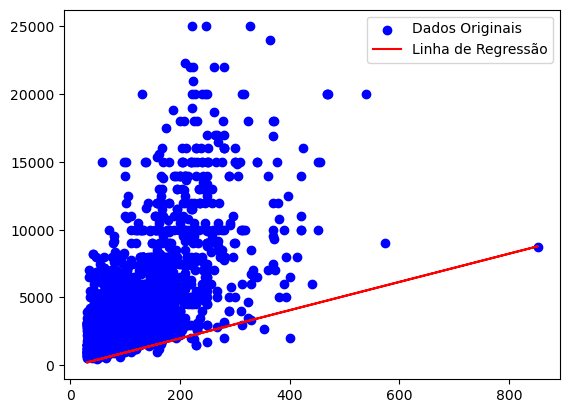

In [104]:
# Seu código aqui
# Importando nova biblioteca:
import matplotlib.pyplot as plt

# Plotando os dados originais:
plt.scatter(X, y, color='blue', label='Dados Originais')

# Plotando a linha de regressão:
plt.plot(X, regressao_Metragem.predict(X), color='red', label='Linha de Regressão')
plt.legend()
plt.show()

In [ ]:
# Após análise do gráfico acima, nota-se que os dados originais não estão muito próximos da reta de regressão, isso pode se dar pelo acúmulo de imóveis com metragem entre 0 e 200. 
# Não acredito que a variável escolhida pelo exercício 'Metragem' segue a mais adequada para ser a variável preditora.

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [107]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [108]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste:
previsoes = regressao_Metragem.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_Metragem.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: -0.19527055667579885


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Escreva sua resposta aqui.

In [ ]:
# Conforme analisado acima, o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste.
# Isso sugere que o modelo está superajustado aos dados de treinamento.
# Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.


# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [113]:
#seu código aqui
# a seguir iremos separar a variáveis independentes da variável dependente
X_train = df[['Valor_Condominio', 'Metragem', 'N_Quartos','N_banheiros','N_Suites', 'N_Vagas']] # Variáveis independentes (características)
y_train = df['Valor_Aluguel']  # Variável dependente (rótulo)

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [114]:
#seu código aqui
# Importando nova biblioteca:
from sklearn.linear_model import LinearRegression

# A seguir, faremos o modelo de regressão múltipla na base de treino:
regressao_multipla = LinearRegression()
regressao_multipla.fit(X_train,y_train)


LinearRegression()

In [115]:
regressao_multipla.intercept_

np.float64(345.21092995242725)

In [116]:
regressao_multipla.coef_

array([   0.81890372,   20.99640136, -651.15175248,  232.19226073,
        300.5291752 ,  557.69025335])

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [118]:
#seu código aqui
# A seguir printaremos o valor de R²:
regressao_multipla.score(X_train,y_train)

0.6076098775929859

In [ ]:
# Este modelo possui um valor de R² de 0.607, o que quer dizer que é eficaz, cerca de 60.7% de acerto. 

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [119]:
#seu código aqui
# a seguir iremos separar a variáveis independentes da variável dependente na base de teste:
X = df[['Valor_Condominio', 'Metragem', 'N_Quartos','N_banheiros','N_Suites', 'N_Vagas']] # Variáveis independentes (características)
y = df['Valor_Aluguel']  # Variável dependente (rótulo)


In [121]:
# A seguir, faremos o modelo de regressão múltipla na base de teste:
regressao_multipla_teste = LinearRegression()
regressao_multipla_teste.fit(X,y)

LinearRegression()

In [122]:
regressao_multipla_teste.intercept_

np.float64(345.21092995242725)

In [123]:
regressao_multipla_teste.coef_

array([   0.81890372,   20.99640136, -651.15175248,  232.19226073,
        300.5291752 ,  557.69025335])

In [124]:
# A seguir printaremos o valor de R² na base de teste:
regressao_multipla_teste.score(X,y)

0.6076098775929859

E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Digite sua resposta aqui

In [ ]:
# Após análise, identificamos o valor de - 0.19 para o modelo de regressão linear, enquanto o valor de 0.60 para o modelo de regressão múltipla.
# Claramente o modelo de regressão múltipla parace mais adequado para a utilização. 
# Acredito que isto pode ter ocorrido, devido à escolha do exercício de usar a variável 'Metragem' para atulização de variável preditora na regressão linear e a escolha da variável 'Valor_Aluguel' como variável preditora para utilização na regressão múltipla pode ter incluenciado nos resultados e desta forma, faz-se com que o modelo de regressão múltipla seja o mais aplicável para o presente DataFrame.

In [ ]:
# Fim.

In [ ]:
# Obrservação: Devido ao enunciado ser diferente ao do apresentado no vídeo explicativo do exercício do módulo 18, achei confuso para desenvolver a resposta do mesmo.
# Seria bom explicar nos vídeos de treino e teste, a fazer a separação entre eles. No vídeo a tutora cria um DataFrame pequeno e não realiza a separação de treino e teste. Isso dificultou na hora do desenvolvimento da atividade, visto que nos obrigava a fazer a separação das bases de treino e teste.